In [25]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('font', family='Malgun Gothic')

import seaborn as sns

import os
from os.path import join

In [2]:
# 데이터 호출하기

data_dir = os.getenv('USERPROFILE')+'/aiffel/data'


entry_data_path = join(data_dir, 'entry_data.csv')
sales_data_path = join(data_dir, 'sales_data.csv')
item_data_path = join(data_dir, 'item_data.csv')
item_entry_data_path = join(data_dir, 'item_entry_data.csv')

entry_data = pd.read_csv(entry_data_path)
sales_data = pd.read_csv(sales_data_path)
item_data = pd.read_csv(item_data_path)
item_entry_data = pd.read_csv(item_entry_data_path)

In [3]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [4]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [5]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [6]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.)

In [7]:
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data

In [8]:
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].str[:7]

In [9]:
# salse_data의 결제금액에 포함된 쉼표(,) 지우기
sales_data['결제금액'] = sales_data['결제금액'].str.replace(',', '')

In [10]:
# salse_data의 결제금액을 숫자형태로 바꾸기
temp_var['payment'] = sales_data['결제금액'].astype(int)

In [11]:
# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var['payment'].groupby(temp_var['date']).sum()
payment_data

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: payment, dtype: int32

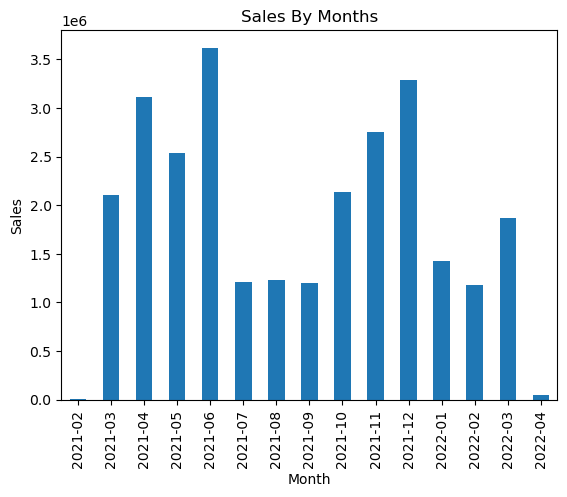

In [12]:
# 집계 결과를 시각화하기
ax = payment_data.plot(kind='bar')

plt.title('Sales By Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

필수 문제2: 가장 인기 있는 음식/음료(salses_data를 이용합니다.)

In [13]:
# temp_var의 상품명을 value_counts를 이용해 집계하기
items_count = temp_var[temp_var['판매수량']!=-1].value_counts()
items_count

결제일시              판매위치  상품명         결제방식  비고    판매수량  결제금액  고객              date     payment
2021-10-05 13:33  선불기1  치즈추가        현금    결제완료  1     500   customer803089  2021-10  500        4
                        라면          현금    결제완료  1     4000  customer803089  2021-10  4000       4
2021-10-07 10:05  선불기1  시럽추가        신용카드  결제완료  1     500   customer777135  2021-10  500        4
2021-06-19 21:02  선불기1  라면          신용카드  결제완료  1     4000  customer283589  2021-06  4000       4
2021-06-14 11:37  선불기1  치즈추가        신용카드  결제완료  1     500   customer950393  2021-06  500        3
                                                                                               ..
2021-06-13 12:59  선불기1  계란추가        신용카드  결제완료  1     500   customer339447  2021-06  500        1
2021-06-13 11:46  선불기1  새우볶음밥       신용카드  결제완료  1     5000  customer950393  2021-06  5000       1
2021-06-13 10:33  선불기1  김치볶음밥       신용카드  결제완료  1     5000  customer983308  2021-06  5000       1
2021-06-13 10:00  선불기1  김

In [14]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = pd.DataFrame(items_count)
items_count[:10]

0
결제일시             판매위치 상품명   결제방식 비고   판매수량 결제금액 고객             date    payment   
2021-10-05 13:33 선불기1 치즈추가  현금   결제완료 1    500  customer803089 2021-10 500      4
                      라면    현금   결제완료 1    4000 customer803089 2021-10 4000     4
2021-10-07 10:05 선불기1 시럽추가  신용카드 결제완료 1    500  customer777135 2021-10 500      4
2021-06-19 21:02 선불기1 라면    신용카드 결제완료 1    4000 customer283589 2021-06 4000     4
2021-06-14 11:37 선불기1 치즈추가  신용카드 결제완료 1    500  customer950393 2021-06 500      3
2021-03-23 13:41 선불기1 계란추가  신용카드 결제완료 1    500  customer556974 2021-03 500      3
2021-11-29 19:20 선불기1 김치볶음밥 신용카드 결제완료 1    5000 customer975556 2021-11 5000     3
2021-06-16 12:17 선불기1 라면    신용카드 결제완료 1    4000 customer996256 2021-06 4000     3
2021-08-22 17:12 선불기1 라면    신용카드 결제완료 1    4000 customer439220 2021-08 4000     3
2021-04-25 18:31 선불기1 김치볶음밥 신용카드 결제완료 1    5000 customer304481 2021-04 5000     3

In [15]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


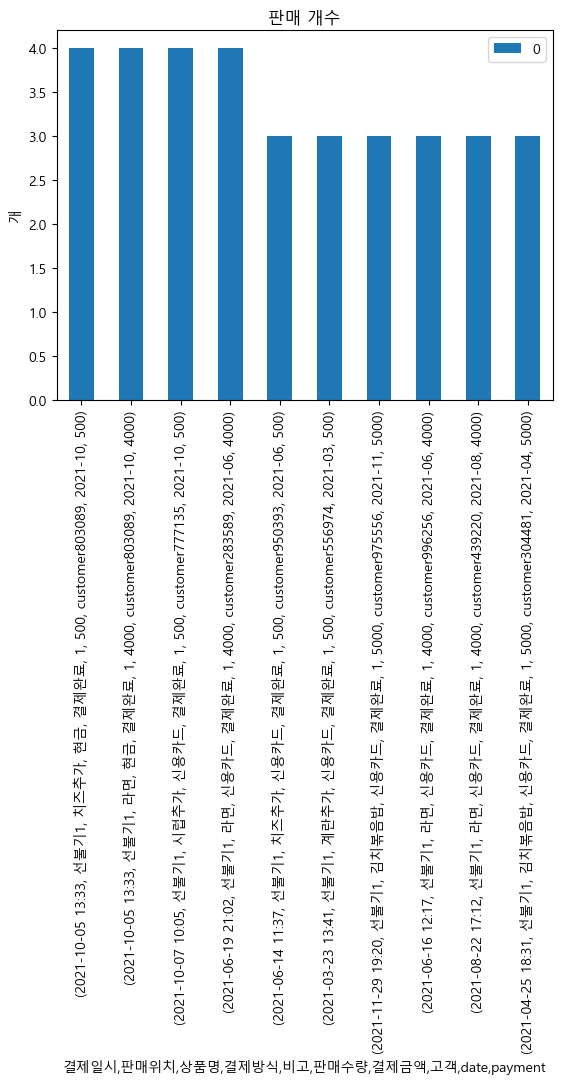

In [26]:
# 집계 결과를 시각화하기
items_count[:10].plot(kind='bar')
plt.ylabel('개')
plt.title('판매 개수')
plt.show()

In [17]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
items_payment = temp_var['payment'].groupby(temp_var['상품명']).sum()
items_payment

상품명
(면)계란추가-국물라면           5000
(면)계란후라이 추가-불닭/짜장     20000
(면)치즈추가               10500
(밥)계란후라이 추가            3000
(밥)슈레드치즈추가             4500
                      ...  
한돈간장불고기덮밥            112500
한돈고추장불고기덮밥           127500
허니밀크쉐이크              108500
헤이즐넛라떼(HOT)            9000
헤이즐넛라떼(ICE)           62500
Name: payment, Length: 100, dtype: int32

In [18]:
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = items_payment.sort_values(ascending=False)
items_payment[:10]

상품명
김치볶음밥         5971900
라면            2916000
치즈불고기볶음밥      2276100
짜장라면          2032500
낙지볶음밥         1699700
새우볶음밥         1529800
치즈감자튀김        1348700
감자튀김          1083800
아메리카노(ICE)     936100
불닭볶음면          688500
Name: payment, dtype: int32

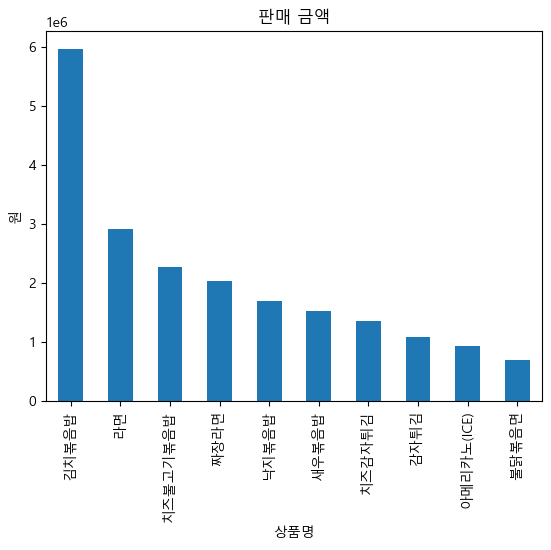

In [27]:
# 집계 결과 시각화하기
items_payment[:10].plot(kind='bar')
plt.ylabel('원')
plt.title('판매 금액')
plt.show()

필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)

In [20]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [21]:
# temp_var의 금액을 숫자형태로 변환하기
temp_var['금액'] = temp_var['금액'].astype(int)

In [22]:
# temp_var의 금액을 요금제명을 기준으로 집계하기
tickets = temp_var['금액'].groupby(temp_var['요금제명']).sum()
tickets

요금제명
18시이후 무제한           1330500
1시간                   90000
1시간 요금제               14000
3시간                   21000
기간권                       0
무제한 입장권             1568600
무제한(일반요금)              6000
무제한(한국대생)             14000
시간 요금제(1시간당)          25000
시간권                       0
시간요금제                 12300
시간요금제(1시간)          2665500
시간요금제(1시간당)           22500
시간요금제(3시간)          2042000
심야-조조무제한            6221000
심야-조조무제한(06시까지)    11600000
이용권                       0
입장권(종일권)           23570500
조조무제한                693000
종일요금제                233000
한국대생 무제한 입장권        5207500
한국대생 입장권(종일권)      70037000
Name: 금액, dtype: int32

In [23]:
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets = tickets.sort_values(ascending=False)
tickets[:10]

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int32

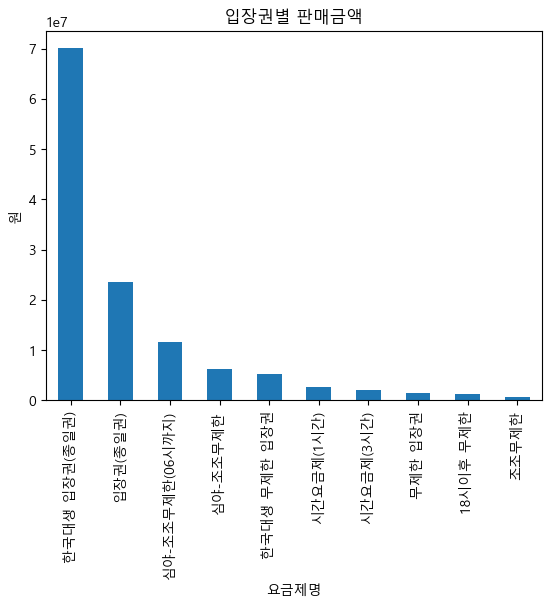

In [28]:
# 집계 결과 시각화하기
tickets[:10].plot(kind='bar')
plt.ylabel('원')
plt.title('입장권별 판매금액')
plt.show()